In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a6a3d70d-c427-420b-85d6-5062abac84f8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-23T16:50:30.239Z', 'error_code': 0, 'error_message': None, 'elapsed': 71, 'credit_count': 25, 'notice': None, 'total_count': 10006}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11614, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)


In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id             name symbol             slug  num_market_pairs  \
0         1          Bitcoin    BTC          bitcoin             11614   
1      1027         Ethereum    ETH         ethereum              9165   
2       825      Tether USDt   USDT           tether             92334   
3      1839              BNB    BNB              bnb              2197   
4      5426           Solana    SOL           solana               707   
...     ...              ...    ...              ...               ...   
4995   4883      GoldeNugget   GNTO      goldenugget                 1   
4996  10585  TrustFi Network    TFI  trustfi-network                 9   
4997     18      Digitalcoin    DGC      digitalcoin                 2   
4998   4808       Bincentive   BCNT       bincentive                 4   
4999  17969    Heroes of NFT    HON    heroes-of-nft                12   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2019-11-06T00:00:00.000Z   
4996  2021-06-23T00:00:00.000Z   
4997  2013-06-09T00:00:00.000Z   
4998  2020-05-11T00:00:00.000Z   
4999  2022-02-09T06:27:41.000Z   

                                                   tags   max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...   21000000.0   
1     [pos, smart-contracts, ethereum-ecosystem, coi...          NaN   
2     [stablecoin, asset-backed-stablecoin, avalanch...          NaN   
3     [marketplace, centralized-exchange, payments, ...          NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...          NaN   
...                                                 ...          ...   
4995                                                 []          NaN   
4996  [defi, yield-farming, launchpad, web3, bnb-chain]  100000000.0   
4997                            [mineable, pow, scrypt]   48166000.0   
4998                                                 []          NaN   
4999     [collectibles-nfts, defi, avalanche-ecosystem]  200000000.0   

      circulating_supply         total_supply  infinite_supply  platform  \
0           1.972994e+07             19729940            False       NaN   
1           1.202283e+08     120228315.019602             True       NaN   
2           1.142402e+11  117072162580.364532             True       NaN   
3           1.459379e+08      145937932.44776            False       NaN   
4           4.645084e+08     580743269.582845             True       NaN   
...                  ...                  ...              ...       ...   
4995        0.000000e+00             30000000            False       NaN   
4996        0.000000e+00            100000000            False       NaN   
4997        0.000000e+00      42867940.844036            False       NaN   
4998        0.000000e+00           1000000000            False       NaN   
4999        0.000000e+00            200000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                        47375000.0             494890.991034   
4997      4998                               NaN                       NaN   
4998      4999                               NaN                       NaN   
4999      5000                        75064704.0             801019.825031 

In [5]:
def api_runner():
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a6a3d70d-c427-420b-85d6-5062abac84f8',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')
        return df2
    except Exception as e:
        print(e)
        return pd.DataFrame()  # Return an empty DataFrame in case of error
    

In [6]:
import os
from time import time
from time import sleep

df = pd.DataFrame()

for i in range(5):
    new_data = api_runner()
    df = pd.concat([df, new_data], ignore_index=True)
    if not os.path.isfile(r'C:\Users\User\OneDrive - MSFT\Documents\Sanjeewa\Portfolio\Python\Crypto API Pull\APIData\API.csv'):
        df.to_csv(r'C:\Users\User\OneDrive - MSFT\Documents\Sanjeewa\Portfolio\Python\Crypto API Pull\APIData\API.csv' , header = 'column_names')
    else:
        df.to_csv(r'C:\Users\User\OneDrive - MSFT\Documents\Sanjeewa\Portfolio\Python\Crypto API Pull\APIData\API.csv', mode='a', header = False)
    print('API Runner Completed')
    sleep(30)  # Sleep for 30 seconds

print(df)

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
          id             name symbol             slug  num_market_pairs  \
0          1          Bitcoin    BTC          bitcoin             11614   
1       1027         Ethereum    ETH         ethereum              9165   
2        825      Tether USDt   USDT           tether             92334   
3       1839              BNB    BNB              bnb              2197   
4       5426           Solana    SOL           solana               707   
...      ...              ...    ...              ...               ...   
24995   4883      GoldeNugget   GNTO      goldenugget                 1   
24996  10585  TrustFi Network    TFI  trustfi-network                 9   
24997     18      Digitalcoin    DGC      digitalcoin                 2   
24998   4808       Bincentive   BCNT       bincentive                 4   
24999  17969    Heroes of NFT    HON    heroes-of-nft                1

In [7]:
df

id             name symbol             slug  num_market_pairs  \
0          1          Bitcoin    BTC          bitcoin             11614   
1       1027         Ethereum    ETH         ethereum              9165   
2        825      Tether USDt   USDT           tether             92334   
3       1839              BNB    BNB              bnb              2197   
4       5426           Solana    SOL           solana               707   
...      ...              ...    ...              ...               ...   
24995   4883      GoldeNugget   GNTO      goldenugget                 1   
24996  10585  TrustFi Network    TFI  trustfi-network                 9   
24997     18      Digitalcoin    DGC      digitalcoin                 2   
24998   4808       Bincentive   BCNT       bincentive                 4   
24999  17969    Heroes of NFT    HON    heroes-of-nft                12   

                     date_added  \
0      2010-07-13T00:00:00.000Z   
1      2015-08-07T00:00:00.000Z   
2      2015-02-25T00:00:00.000Z   
3      2017-07-25T00:00:00.000Z   
4      2020-04-10T00:00:00.000Z   
...                         ...   
24995  2019-11-06T00:00:00.000Z   
24996  2021-06-23T00:00:00.000Z   
24997  2013-06-09T00:00:00.000Z   
24998  2020-05-11T00:00:00.000Z   
24999  2022-02-09T06:27:41.000Z   

                                                    tags   max_supply  \
0      [mineable, pow, sha-256, store-of-value, state...   21000000.0   
1      [pos, smart-contracts, ethereum-ecosystem, coi...          NaN   
2      [stablecoin, asset-backed-stablecoin, avalanch...          NaN   
3      [marketplace, centralized-exchange, payments, ...          NaN   
4      [pos, platform, solana-ecosystem, cms-holdings...          NaN   
...                                                  ...          ...   
24995                                                 []          NaN   
24996  [defi, yield-farming, launchpad, web3, bnb-chain]  100000000.0   
24997                            [mineable, pow, scrypt]   48166000.0   
24998                                                 []          NaN   
24999     [collectibles-nfts, defi, avalanche-ecosystem]  200000000.0   

       circulating_supply         total_supply  infinite_supply  platform  \
0            1.972994e+07             19729940            False       NaN   
1            1.202283e+08     120228315.019602             True       NaN   
2            1.142402e+11  117072162580.364532             True       NaN   
3            1.459379e+08      145937932.44776            False       NaN   
4            4.645084e+08     580743269.582845             True       NaN   
...                   ...                  ...              ...       ...   
24995        0.000000e+00             30000000            False       NaN   
24996        0.000000e+00            100000000            False       NaN   
24997        0.000000e+00      42867940.844036            False       NaN   
24998        0.000000e+00           1000000000            False       NaN   
24999        0.000000e+00            200000000            False       NaN   

       cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0             1                               NaN                       NaN   
1             2                               NaN                       NaN   
2             3                               NaN                       NaN   
3             4                               NaN                       NaN   
4             5                               NaN                       NaN   
...         ...                               ...                       ...   
24995      4996                               NaN                       NaN   
24996      4997                        47375000.0             494890.991034   
24997      4998                               NaN                       NaN   
24998      4999                               NaN                       NaN   
24999      5000  

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

id             name symbol             slug  num_market_pairs  \
0          1          Bitcoin    BTC          bitcoin             11614   
1       1027         Ethereum    ETH         ethereum              9165   
2        825      Tether USDt   USDT           tether             92334   
3       1839              BNB    BNB              bnb              2197   
4       5426           Solana    SOL           solana               707   
...      ...              ...    ...              ...               ...   
24995   4883      GoldeNugget   GNTO      goldenugget                 1   
24996  10585  TrustFi Network    TFI  trustfi-network                 9   
24997     18      Digitalcoin    DGC      digitalcoin                 2   
24998   4808       Bincentive   BCNT       bincentive                 4   
24999  17969    Heroes of NFT    HON    heroes-of-nft                12   

                     date_added  \
0      2010-07-13T00:00:00.000Z   
1      2015-08-07T00:00:00.000Z   
2      2015-02-25T00:00:00.000Z   
3      2017-07-25T00:00:00.000Z   
4      2020-04-10T00:00:00.000Z   
...                         ...   
24995  2019-11-06T00:00:00.000Z   
24996  2021-06-23T00:00:00.000Z   
24997  2013-06-09T00:00:00.000Z   
24998  2020-05-11T00:00:00.000Z   
24999  2022-02-09T06:27:41.000Z   

                                                    tags      max_supply  \
0      [mineable, pow, sha-256, store-of-value, state...  21000000.00000   
1      [pos, smart-contracts, ethereum-ecosystem, coi...             NaN   
2      [stablecoin, asset-backed-stablecoin, avalanch...             NaN   
3      [marketplace, centralized-exchange, payments, ...             NaN   
4      [pos, platform, solana-ecosystem, cms-holdings...             NaN   
...                                                  ...             ...   
24995                                                 []             NaN   
24996  [defi, yield-farming, launchpad, web3, bnb-chain] 100000000.00000   
24997                            [mineable, pow, scrypt]  48166000.00000   
24998                                                 []             NaN   
24999     [collectibles-nfts, defi, avalanche-ecosystem] 200000000.00000   

       circulating_supply       total_supply  infinite_supply  platform  \
0          19729940.00000           19729940            False       NaN   
1         120228315.01960    120228315.01960             True       NaN   
2      114240216367.40688 117072162580.36453             True       NaN   
3         145937932.44776    145937932.44776            False       NaN   
4         464508400.83714    580743269.58284             True       NaN   
...                   ...                ...              ...       ...   
24995             0.00000           30000000            False       NaN   
24996             0.00000          100000000            False       NaN   
24997             0.00000     42867940.84404            False       NaN   
24998             0.00000         1000000000            False       NaN   
24999             0.00000          200000000            False       NaN   

       cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0             1                               NaN                       NaN   
1             2                               NaN                       NaN   
2             3                               NaN                       NaN   
3             4                               NaN                       NaN   
4             5                               NaN                       NaN   
...         ...                               ...                       ...   
24995      4996                               NaN                       NaN   
24996      4997                    47375000.00000              494890.99103   
24997      4998                               NaN                       NaN   
24998      4999                               NaN                       NaN   
24999

In [10]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                         
Bitcoin                             -0.58837                      -1.53040   
Ethereum                            -0.64705                      -1.26255   
Tether USDt                         -0.00463                       0.00246   
BNB                                 -0.51022                      -1.92780   
Solana                              -1.73995                      -3.82631   
...                                      ...                           ...   
GoldeNugget                         -0.00816                       0.03273   
TrustFi Network                     -0.27959                      -5.85944   
Digitalcoin                          0.64517                     -11.97738   
Bincentive                           1.10092                       0.72467   
Heroes of NFT                       -1.15296                      -6.01109   

                 quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                         
Bitcoin                              2.87717                       3.27732   
Ethereum                            -0.84999                      -1.36943   
Tether USDt                         -0.01591                       0.08667   
BNB                                  1.32321                      -0.31348   
Solana                               8.56306                      32.07203   
...                                      ...                           ...   
GoldeNugget                         -0.66850                     230.19230   
TrustFi Network                    -10.89003                     -23.88195   
Digitalcoin                        -31.60165                     -34.29792   
Bincentive                           2.71138                       8.31370   
Heroes of NFT                       10.45972                      26.74422   

                 quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                         
Bitcoin                              -2.99360                       2.29718  
Ethereum                             -6.31040                       8.05992  
Tether USDt                           0.02736                       0.07651  
BNB                                  -2.34153                      -2.80560  
Solana                                4.58272                      14.33587  
...                                       ...                           ...  
GoldeNugget                          61.79500                      72.54431  
TrustFi Network                     -35.14201                     -48.41480  
Digitalcoin                         -78.12224                     -86.49831  
Bincentive                          -10.58717                     -14.76940  
Heroes of NFT                       -15.77039                     -26.26504  

[4947 rows x 6 columns]

In [11]:
df4 = df3.stack()
df4

name                                       
Bitcoin        quote.USD.percent_change_1h     -0.58837
               quote.USD.percent_change_24h    -1.53040
               quote.USD.percent_change_7d      2.87717
               quote.USD.percent_change_30d     3.27732
               quote.USD.percent_change_60d    -2.99360
                                                 ...   
Heroes of NFT  quote.USD.percent_change_24h    -6.01109
               quote.USD.percent_change_7d     10.45972
               quote.USD.percent_change_30d    26.74422
               quote.USD.percent_change_60d   -15.77039
               quote.USD.percent_change_90d   -26.26504
Length: 29682, dtype: float64

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                
Bitcoin       quote.USD.percent_change_1h   -0.58837
              quote.USD.percent_change_24h  -1.53040
              quote.USD.percent_change_7d    2.87717
              quote.USD.percent_change_30d   3.27732
              quote.USD.percent_change_60d  -2.99360
...                                              ...
Heroes of NFT quote.USD.percent_change_24h  -6.01109
              quote.USD.percent_change_7d   10.45972
              quote.USD.percent_change_30d  26.74422
              quote.USD.percent_change_60d -15.77039
              quote.USD.percent_change_90d -26.26504

[29682 rows x 1 columns]

In [14]:
df5.count()

values    29682
dtype: int64

In [15]:
index = pd.Index(range(29700))
df6 = df5.reset_index()
df6

name                       level_1    values
0            Bitcoin   quote.USD.percent_change_1h  -0.58837
1            Bitcoin  quote.USD.percent_change_24h  -1.53040
2            Bitcoin   quote.USD.percent_change_7d   2.87717
3            Bitcoin  quote.USD.percent_change_30d   3.27732
4            Bitcoin  quote.USD.percent_change_60d  -2.99360
...              ...                           ...       ...
29677  Heroes of NFT  quote.USD.percent_change_24h  -6.01109
29678  Heroes of NFT   quote.USD.percent_change_7d  10.45972
29679  Heroes of NFT  quote.USD.percent_change_30d  26.74422
29680  Heroes of NFT  quote.USD.percent_change_60d -15.77039
29681  Heroes of NFT  quote.USD.percent_change_90d -26.26504

[29682 rows x 3 columns]

In [16]:
bitcoin_df = df6[df6['name'] == 'Bitcoin']
bitcoin_df

name                       level_1   values
0  Bitcoin   quote.USD.percent_change_1h -0.58837
1  Bitcoin  quote.USD.percent_change_24h -1.53040
2  Bitcoin   quote.USD.percent_change_7d  2.87717
3  Bitcoin  quote.USD.percent_change_30d  3.27732
4  Bitcoin  quote.USD.percent_change_60d -2.99360
5  Bitcoin  quote.USD.percent_change_90d  2.29718

In [17]:
df7= df6.iloc[:90, :]
df7

name                       level_1    values
0     Bitcoin   quote.USD.percent_change_1h  -0.58837
1     Bitcoin  quote.USD.percent_change_24h  -1.53040
2     Bitcoin   quote.USD.percent_change_7d   2.87717
3     Bitcoin  quote.USD.percent_change_30d   3.27732
4     Bitcoin  quote.USD.percent_change_60d  -2.99360
..        ...                           ...       ...
85  Chainlink  quote.USD.percent_change_24h  -3.59983
86  Chainlink   quote.USD.percent_change_7d  -5.25905
87  Chainlink  quote.USD.percent_change_30d   2.03224
88  Chainlink  quote.USD.percent_change_60d -19.66390
89  Chainlink  quote.USD.percent_change_90d  -7.57549

[90 rows x 3 columns]

In [18]:
df8 = df7.rename(columns={'level_1':'%_change'})
df8

name                      %_change    values
0     Bitcoin   quote.USD.percent_change_1h  -0.58837
1     Bitcoin  quote.USD.percent_change_24h  -1.53040
2     Bitcoin   quote.USD.percent_change_7d   2.87717
3     Bitcoin  quote.USD.percent_change_30d   3.27732
4     Bitcoin  quote.USD.percent_change_60d  -2.99360
..        ...                           ...       ...
85  Chainlink  quote.USD.percent_change_24h  -3.59983
86  Chainlink   quote.USD.percent_change_7d  -5.25905
87  Chainlink  quote.USD.percent_change_30d   2.03224
88  Chainlink  quote.USD.percent_change_60d -19.66390
89  Chainlink  quote.USD.percent_change_90d  -7.57549

[90 rows x 3 columns]

In [19]:
# df8['%_change'].replace(['quote.USD.percent_change_90d','quote.USD.percent_change_60d','quote.USD.percent_change_30d','quote.USD.percent_change_7d','quote.USD.percent_change_24h','quote.USD.percent_change_1h'],['90d','60d','30d','7d','24h','1h'])

df8['%_change'] = df8['%_change'].replace(['quote.USD.percent_change_90d','quote.USD.percent_change_60d','quote.USD.percent_change_30d','quote.USD.percent_change_7d','quote.USD.percent_change_24h','quote.USD.percent_change_1h'],['90d','60d','30d','7d','24h','1h'])



In [20]:
df8

name %_change    values
0     Bitcoin       1h  -0.58837
1     Bitcoin      24h  -1.53040
2     Bitcoin       7d   2.87717
3     Bitcoin      30d   3.27732
4     Bitcoin      60d  -2.99360
..        ...      ...       ...
85  Chainlink      24h  -3.59983
86  Chainlink       7d  -5.25905
87  Chainlink      30d   2.03224
88  Chainlink      60d -19.66390
89  Chainlink      90d  -7.57549

[90 rows x 3 columns]

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

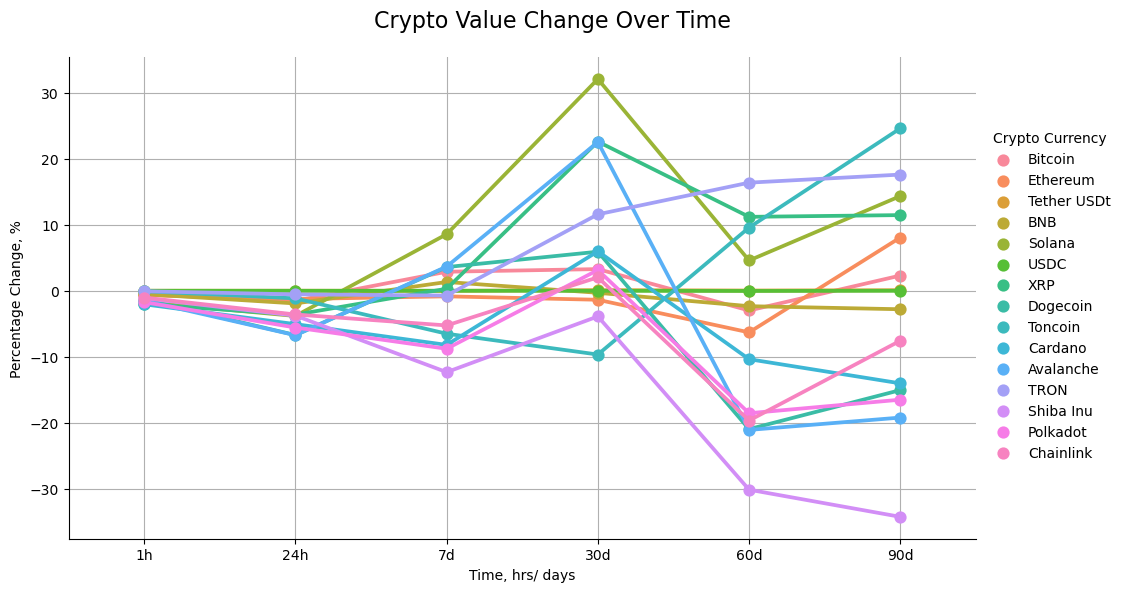

In [195]:
plot = sns.catplot(x='%_change',y='values',hue='name', data = df8, kind = 'point', height=6, aspect=1.67)
# Change the x and y axis labels
plot.set_axis_labels('Time, hrs/ days','Percentage Change, %')
# Change the legend label
plot._legend.set_title('Crypto Currency')
# Add grid
plt.grid(True)
# Add title
plot.fig.suptitle('Crypto Value Change Over Time', fontsize=16)  
# Adjust the layout to make room for the title
plot.fig.subplots_adjust(top=0.9)
# Save the plot to an image file
plot.savefig('plot_image.png', dpi=300) 
plt.show()

In [119]:
distinct_names = df['symbol'].nunique()
print(distinct_names)

4525


In [113]:
# Set option to display all rows
pd.set_option('display.max_rows', None)
df.head(100)

id                                   name  symbol  \
0       1                                Bitcoin     BTC   
1    1027                               Ethereum     ETH   
2     825                            Tether USDt    USDT   
3    1839                                    BNB     BNB   
4    5426                                 Solana     SOL   
5    3408                                   USDC    USDC   
6      52                                    XRP     XRP   
7      74                               Dogecoin    DOGE   
8   11419                                Toncoin     TON   
9    2010                                Cardano     ADA   
10   5805                              Avalanche    AVAX   
11   1958                                   TRON     TRX   
12   5994                              Shiba Inu    SHIB   
13   6636                               Polkadot     DOT   
14   1975                              Chainlink    LINK   
15   1831                           Bitcoin Cash     BCH   
16   6535                          NEAR Protocol    NEAR   
17      2                               Litecoin     LTC   
18   4943                                    Dai     DAI   
19   3957                           UNUS SED LEO     LEO   
20   3890                                Polygon   MATIC   
21  24478                                   Pepe    PEPE   
22   7083                                Uniswap     UNI   
23   8916                      Internet Computer     ICP   
24  20396                                  Kaspa     KAS   
25   1321                       Ethereum Classic     ETC   
26  21794                                  Aptos     APT   
27   3773  Artificial Superintelligence Alliance     FET   
28    328                                 Monero     XMR   
29    512                                Stellar     XLM   
30  27075                                 Mantle     MNT   
31  28752                              dogwifhat     WIF   
32   5690                                 Render  RENDER   
33  11841                               Arbitrum     ARB   
34   4847                                 Stacks     STX   
35   1518                                  Maker     MKR   
36   2280                               Filecoin     FIL   
37   3635                                 Cronos     CRO   
38   4642                                 Hedera    HBAR   
39   3897                                    OKB     OKB   
40   3794                                 Cosmos    ATOM   
41  10603                              Immutable     IMX   
42   3077                                VeChain     VET   
43   7226                              Injective     INJ   
44  22974                              Bittensor     TAO   
45  11840                               Optimism      OP   
46  20947                                    Sui     SUI   
47  26081                      First Digital USD   FDUSD   
48   5632                                Arweave      AR   
49  23095                                   Bonk    BONK   
50   6719                              The Graph     GRT   
51  10804                                  FLOKI   FLOKI   
52  11092                           Bitget Token     BGB   
53   8000                               Lido DAO     LDO   
54   4157                              THORChain    RUNE   
55   2416                          Theta Network   THETA   
56  28850                                Notcoin     NOT   
57   7278                                   Aave    AAVE   
58   3513                                 Fantom     FTM   
59  21159                                   Ondo    ONDO   
60   8425                              JasmyCoin   JASMY   
61  22861                               Celestia     TIA   
62  23254                                   Core    CORE   
63  29743                          Brett (Based)   BRETT   
64  29210                                Jupiter     JUP   
65  28177                           Pyth Networ

In [24]:
# Select specific columns
df_btc = df[['id','name', 'quote.USD.price', 'timestamp']]
df_btc2 = df_btc[df_btc['name']=='Bitcoin'] 
df_btc2

id     name  quote.USD.price                  timestamp
0       1  Bitcoin      66174.72918 2024-07-23 22:20:33.363826
5000    1  Bitcoin      66174.72918 2024-07-23 22:21:03.631400
10000   1  Bitcoin      66174.72918 2024-07-23 22:21:34.109436
15000   1  Bitcoin      66174.72918 2024-07-23 22:22:04.727082
20000   1  Bitcoin      66174.72918 2024-07-23 22:22:35.575839

C:\Users\User\AppData\Local\Temp\ipykernel_8316\4016884699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc2['timestamp'] = pd.to_datetime(df_btc2['timestamp'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


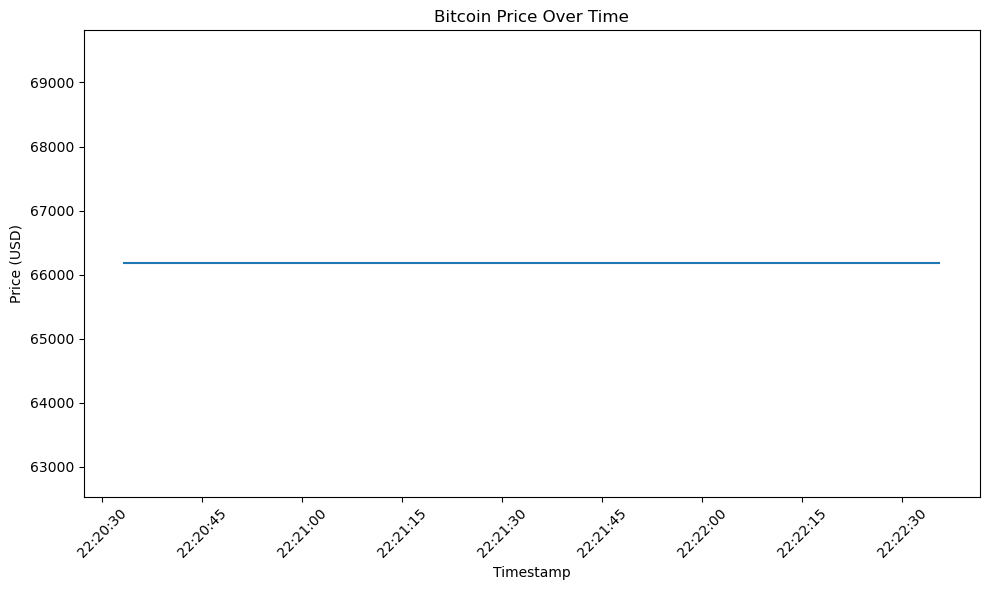

In [25]:
# Convert the 'timestamp' column to datetime
df_btc2['timestamp'] = pd.to_datetime(df_btc2['timestamp'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_btc2)

# Customize the plot
plt.title('Bitcoin Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [129]:
# Group by 'name' and sum the 'quote.USD.market_cap'
aggregated_df = df.groupby('name')['quote.USD.market_cap'].max().reset_index()
# Convert market cap to USD millions and remove decimals
aggregated_df['quote.USD.market_cap'] = (aggregated_df['quote.USD.market_cap'] / 1_000_000_000).astype(int)
# Sort by 'quote.USD.market_cap' in descending order and select the top 10
top_10_crypto = aggregated_df.sort_values(by='quote.USD.market_cap', ascending=False).head(10)

print(top_10_crypto)

             name  quote.USD.market_cap
578       Bitcoin                  1305
1452     Ethereum                   412
4174  Tether USDt                   114
415           BNB                    84
3879       Solana                    80
4350         USDC                    34
4671          XRP                    32
1265     Dogecoin                    18
4259      Toncoin                    17
812       Cardano                    14


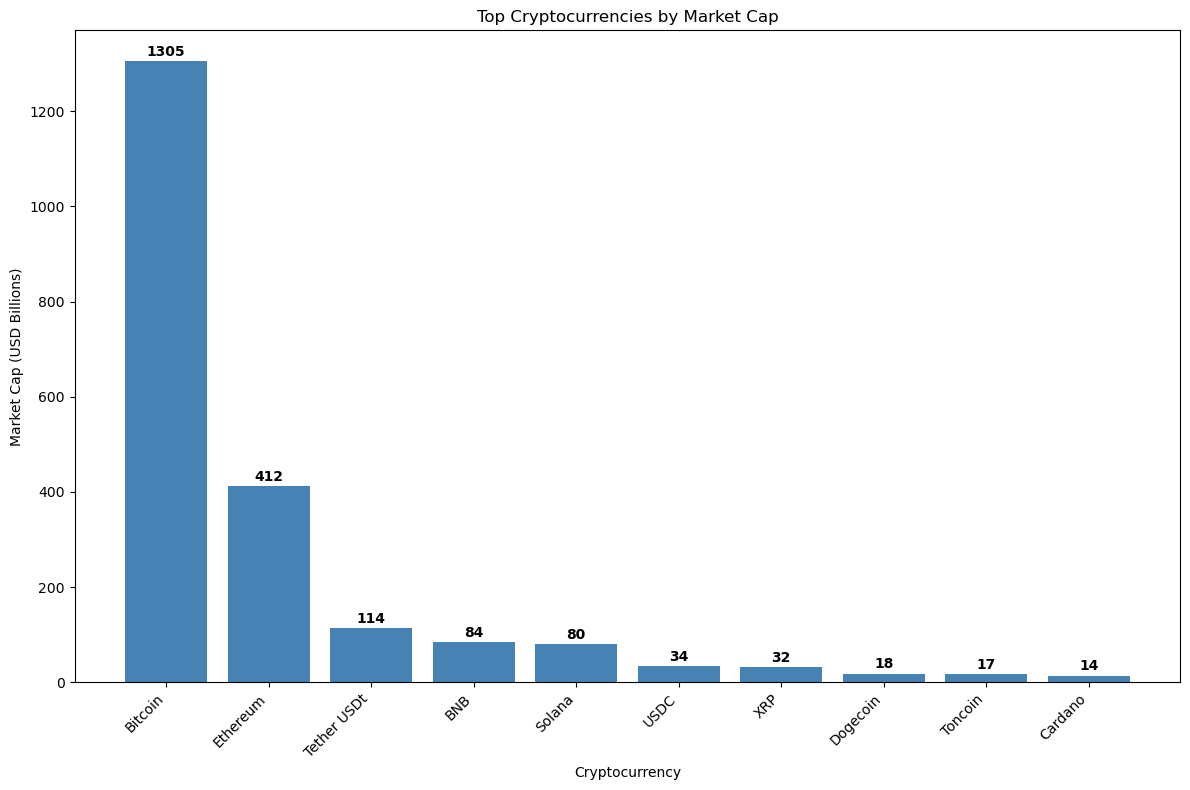

In [177]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_crypto['name'], top_10_crypto['quote.USD.market_cap'], color='steelblue')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 5,  # Position slightly above the bar
        int(yval),  # Display value as integer
        ha='center', 
        va='bottom', 
        fontweight='bold'
    )
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Cap (USD Billions)')
plt.title('Top Cryptocurrencies by Market Cap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit labels
plt.savefig('market_cap_column_chart.png', dpi=300)
plt.show()

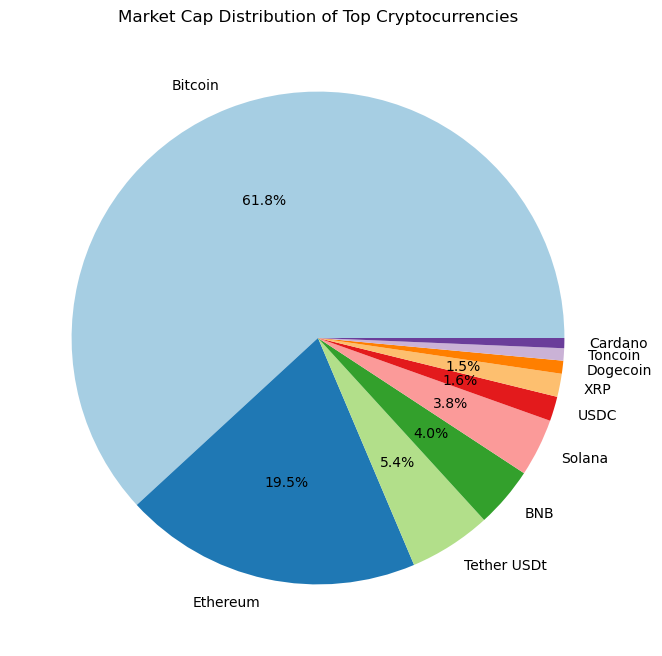

In [155]:
# Define a custom function for data labels
def custom_autopct(pct, allvals):
    # Exclude data labels for the last 3 slices
    if pct < 1:
        return ''  # Return an empty string for small slices
    else:
        return '{:.1f}%'.format(pct)  # Format the percentage for the remaining slices


# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_10_crypto['quote.USD.market_cap'],
    labels=top_10_crypto['name'],
    autopct=lambda pct: custom_autopct(pct, df['quote.USD.market_cap']),
    colors=plt.cm.Paired(range(len(top_10_crypto))),
    # textprops={'fontweight': 'bold'}
)

plt.title('Market Cap Distribution of Top Cryptocurrencies')
plt.savefig('market_cap_pie_chart.png', dpi=300)
plt.show()

In [169]:
# Group by 'name' and sum the 'quote.USD.market_cap'
aggregated_df2 = df.groupby('name')['quote.USD.price'].max().reset_index()
# Convert market cap to USD millions and remove decimals
aggregated_df2['quote.USD.price'] = (aggregated_df2['quote.USD.price'] ).astype(int)
# Sort by 'quote.USD.market_cap' in descending order and select the top 10
top_10_crypto2 = aggregated_df2.sort_values(by='quote.USD.price', ascending=False).head(10)

top_10_crypto2 = top_10_crypto2.sort_values(by='quote.USD.price', ascending=True)
print(top_10_crypto2)

                   name  quote.USD.price
4594         Whiteheart             5874
4157     Ten Best Coins             7044
4368             Ultima             7679
4213         Thoreum V3            10337
2139        Jinbi Token            11044
683       BounceBit BTC            65714
578             Bitcoin            66174
594       Bitcoin TRC20            66649
440           BTC Proxy            67096
3407  Punk Vault (NFTX)            85937


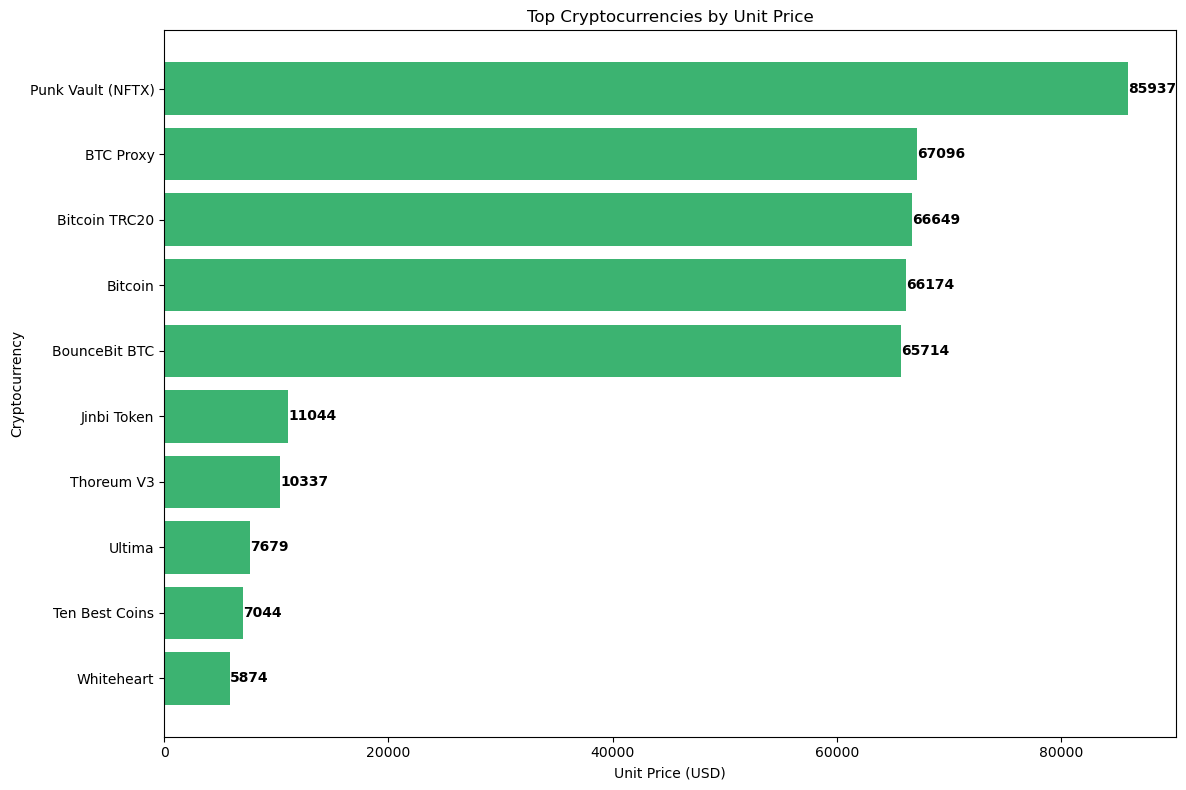

In [193]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_crypto2['name'], top_10_crypto2['quote.USD.price'], color='mediumseagreen')

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width() + 10,  # Position slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        int(bar.get_width()),  # Display value as integer
        ha='left', 
        va='center', 
        fontweight='bold'
    )

plt.xlabel('Unit Price (USD)')
plt.ylabel('Cryptocurrency')
plt.title('Top Cryptocurrencies by Unit Price')
plt.tight_layout()  # Adjust layout to fit labels
plt.savefig('unit_price_bar_chart.png', dpi=300)
plt.show()